### Q-2. Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.

In [132]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

In [133]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [134]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [135]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [137]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [138]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [139]:
df['Gender'] = df['Gender'].str.replace('Female','0')
df['Gender'] = df['Gender'].str.replace('Male','1')
df['Gender'] = df['Gender'].astype('int64')
df['family_history_with_overweight'] = df['family_history_with_overweight'].str.replace('yes','1')
df['family_history_with_overweight'] = df['family_history_with_overweight'].str.replace('no','0')
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype('int64')
df['FAVC'] = df['FAVC'].str.replace('no','0')
df['FAVC'] = df['FAVC'].str.replace('yes','1')
df['FAVC'] = df['FAVC'].astype('int64')
df['CAEC'] = df['CAEC'].str.replace('Sometimes','1')
df['CAEC'] = df['CAEC'].str.replace('Frequently','2')
df['CAEC'] = df['CAEC'].str.replace('Always','3')
df['CAEC'] = df['CAEC'].str.replace('no','0')
df['CAEC'] = df['CAEC'].astype('int64')
df['SMOKE'] = df['SMOKE'].str.replace('no','0')
df['SMOKE'] = df['SMOKE'].str.replace('yes','1')
df['SMOKE'] = df['SMOKE'].astype('int64')
df['SCC'] = df['SCC'].str.replace('no','0')
df['SCC'] = df['SCC'].str.replace('yes','1')
df['SCC'] = df['SCC'].astype('int64')
df['CALC'] = df['CALC'].str.replace('Sometimes','1')
df['CALC'] = df['CALC'].str.replace('Frequently','2')
df['CALC'] = df['CALC'].str.replace('Always','3')
df['CALC'] = df['CALC'].str.replace('no','0')
df['CALC'] = df['CALC'].astype('int64')
df['MTRANS'] = df['MTRANS'].str.replace('Public_Transportation','1')
df['MTRANS'] = df['MTRANS'].str.replace('Automobile','2')
df['MTRANS'] = df['MTRANS'].str.replace('Motorbike','3')
df['MTRANS'] = df['MTRANS'].str.replace('Bike','4')
df['MTRANS'] = df['MTRANS'].str.replace('Walking','0')
df['MTRANS'] = df['MTRANS'].astype('int64')
df['NObeyesdad'] = df['NObeyesdad'].str.replace('Overweight_Level_II','1')
df['NObeyesdad'] = df['NObeyesdad'].str.replace('Overweight_Level_I','2')
df['NObeyesdad'] = df['NObeyesdad'].str.replace('Obesity_Type_III','6')
df['NObeyesdad'] = df['NObeyesdad'].str.replace('Obesity_Type_II','5')
df['NObeyesdad'] = df['NObeyesdad'].str.replace('Obesity_Type_I','3')
df['NObeyesdad'] = df['NObeyesdad'].str.replace('Insufficient_Weight','4')
df['NObeyesdad'] = df['NObeyesdad'].str.replace('Normal_Weight','0')
df['NObeyesdad'] = df['NObeyesdad'].astype('int64')

In [140]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,1


In [141]:
X = df.drop("NObeyesdad",axis=1)
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1


In [142]:
y = df["NObeyesdad"]
y.head()

0    0
1    0
2    0
3    2
4    1
Name: NObeyesdad, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [144]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [145]:
scaler.mean_

array([5.09900990e-01, 2.45454209e+01, 1.70267988e+00, 8.66112457e+01,
       8.18953324e-01, 8.90381895e-01, 2.41744429e+00, 2.67729263e+00,
       1.13437058e+00, 2.40452617e-02, 2.00375208e+00, 4.24328147e-02,
       1.00501633e+00, 6.42354247e-01, 7.25601132e-01, 1.21428571e+00])

In [146]:
X_train_tf = scaler.transform(X_train)
X_train_tf

array([[ 0.98039025, -0.98824201,  0.39873626, ..., -1.06318882,
        -1.40425203, -0.42230345],
       [ 0.98039025,  0.80588258,  0.81594424, ...,  0.05792963,
         0.53104268,  1.54844597],
       [ 0.98039025, -0.55338898, -0.30292832, ...,  1.32553496,
        -1.40425203, -0.42230345],
       ...,
       [-1.02000198, -0.23486411, -0.56284326, ...,  2.24709931,
        -1.40425203, -0.42230345],
       [-1.02000198, -0.23333104, -0.79610108, ..., -0.0190147 ,
        -1.40425203, -0.42230345],
       [ 0.98039025, -0.68627762,  1.22654938, ..., -0.1336566 ,
         0.53104268, -0.42230345]])

### Support Vector Classifier

In [147]:
model=SVC()
model.fit(X_train_tf,y_train)

SVC()

In [148]:
model.score(X_train_tf,y_train)

0.942008486562942

In [149]:
X_test_tf = scaler.transform(X_test)
X_test_tf

array([[-1.02000198, -0.62484734,  0.56944867, ...,  2.24709931,
        -1.40425203, -0.42230345],
       [-1.02000198,  0.21961555, -0.83048289, ..., -0.5291301 ,
         0.53104268, -0.42230345],
       [ 0.98039025, -0.98824201,  1.57400011, ..., -1.06318882,
         0.53104268,  1.54844597],
       ...,
       [ 0.98039025,  2.480273  ,  0.49922132, ..., -1.06318882,
        -1.40425203,  1.54844597],
       [ 0.98039025, -1.1392242 ,  0.18505192, ...,  0.59195525,
        -1.40425203, -0.42230345],
       [ 0.98039025, -0.09983077,  0.11907688, ...,  0.59195525,
         0.53104268, -0.42230345]])

In [150]:
y_predict = model.predict(X_test_tf)

In [151]:
accuracy_score(y_test,y_predict)

0.8708751793400287

In [153]:
print("Support veector Classifier report: \n\n", classification_report(y_test, y_predict))

Support veector Classifier report: 

               precision    recall  f1-score   support

           0       0.73      0.83      0.78       103
           1       0.78      0.80      0.79        87
           2       0.81      0.66      0.73        94
           3       0.94      0.87      0.90       114
           4       0.89      0.93      0.91        90
           5       0.93      0.98      0.95        94
           6       1.00      0.99      1.00       115

    accuracy                           0.87       697
   macro avg       0.87      0.87      0.87       697
weighted avg       0.87      0.87      0.87       697



### Logistic regression

In [154]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_tf,y_train)

LogisticRegression()

In [155]:
model.score(X_train_tf,y_train)

0.942008486562942

In [156]:
y_predict1 = model1.predict(X_test_tf)

In [157]:
accuracy_score(y_test,y_predict1)

0.860832137733142

In [159]:
print("Logistic Regression report: \n\n", classification_report(y_test, y_predict1))

Logistic Regression report: 

               precision    recall  f1-score   support

           0       0.89      0.60      0.72       103
           1       0.73      0.83      0.77        87
           2       0.72      0.70      0.71        94
           3       0.95      0.92      0.93       114
           4       0.80      0.99      0.89        90
           5       0.92      0.98      0.95        94
           6       1.00      0.99      1.00       115

    accuracy                           0.86       697
   macro avg       0.86      0.86      0.85       697
weighted avg       0.87      0.86      0.86       697



### Decision Tree classifier 

In [160]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_tf, y_train)

DecisionTreeClassifier()

[Text(0.6488263574660633, 0.96875, 'x[3] <= 0.498\ngini = 0.856\nsamples = 1414\nvalue = [184, 203, 196, 237, 182, 203, 209]'),
 Text(0.37683823529411764, 0.90625, 'x[3] <= -1.021\ngini = 0.801\nsamples = 931\nvalue = [184, 199, 196, 165, 182, 5, 0]'),
 Text(0.17364253393665158, 0.84375, 'x[2] <= -0.454\ngini = 0.472\nsamples = 277\nvalue = [92, 1, 5, 0, 179, 0, 0]'),
 Text(0.06447963800904978, 0.78125, 'x[3] <= -1.53\ngini = 0.53\nsamples = 146\nvalue = [80, 1, 5, 0, 60, 0, 0]'),
 Text(0.01809954751131222, 0.71875, 'x[2] <= -2.059\ngini = 0.097\nsamples = 59\nvalue = [3, 0, 0, 0, 56, 0, 0]'),
 Text(0.00904977375565611, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.027149321266968326, 0.65625, 'x[1] <= -1.215\ngini = 0.067\nsamples = 58\nvalue = [2, 0, 0, 0, 56, 0, 0]'),
 Text(0.01809954751131222, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.03619909502262444, 0.59375, 'x[15] <= 0.563\ngini = 0.034\nsamples = 57\nvalue = [1, 

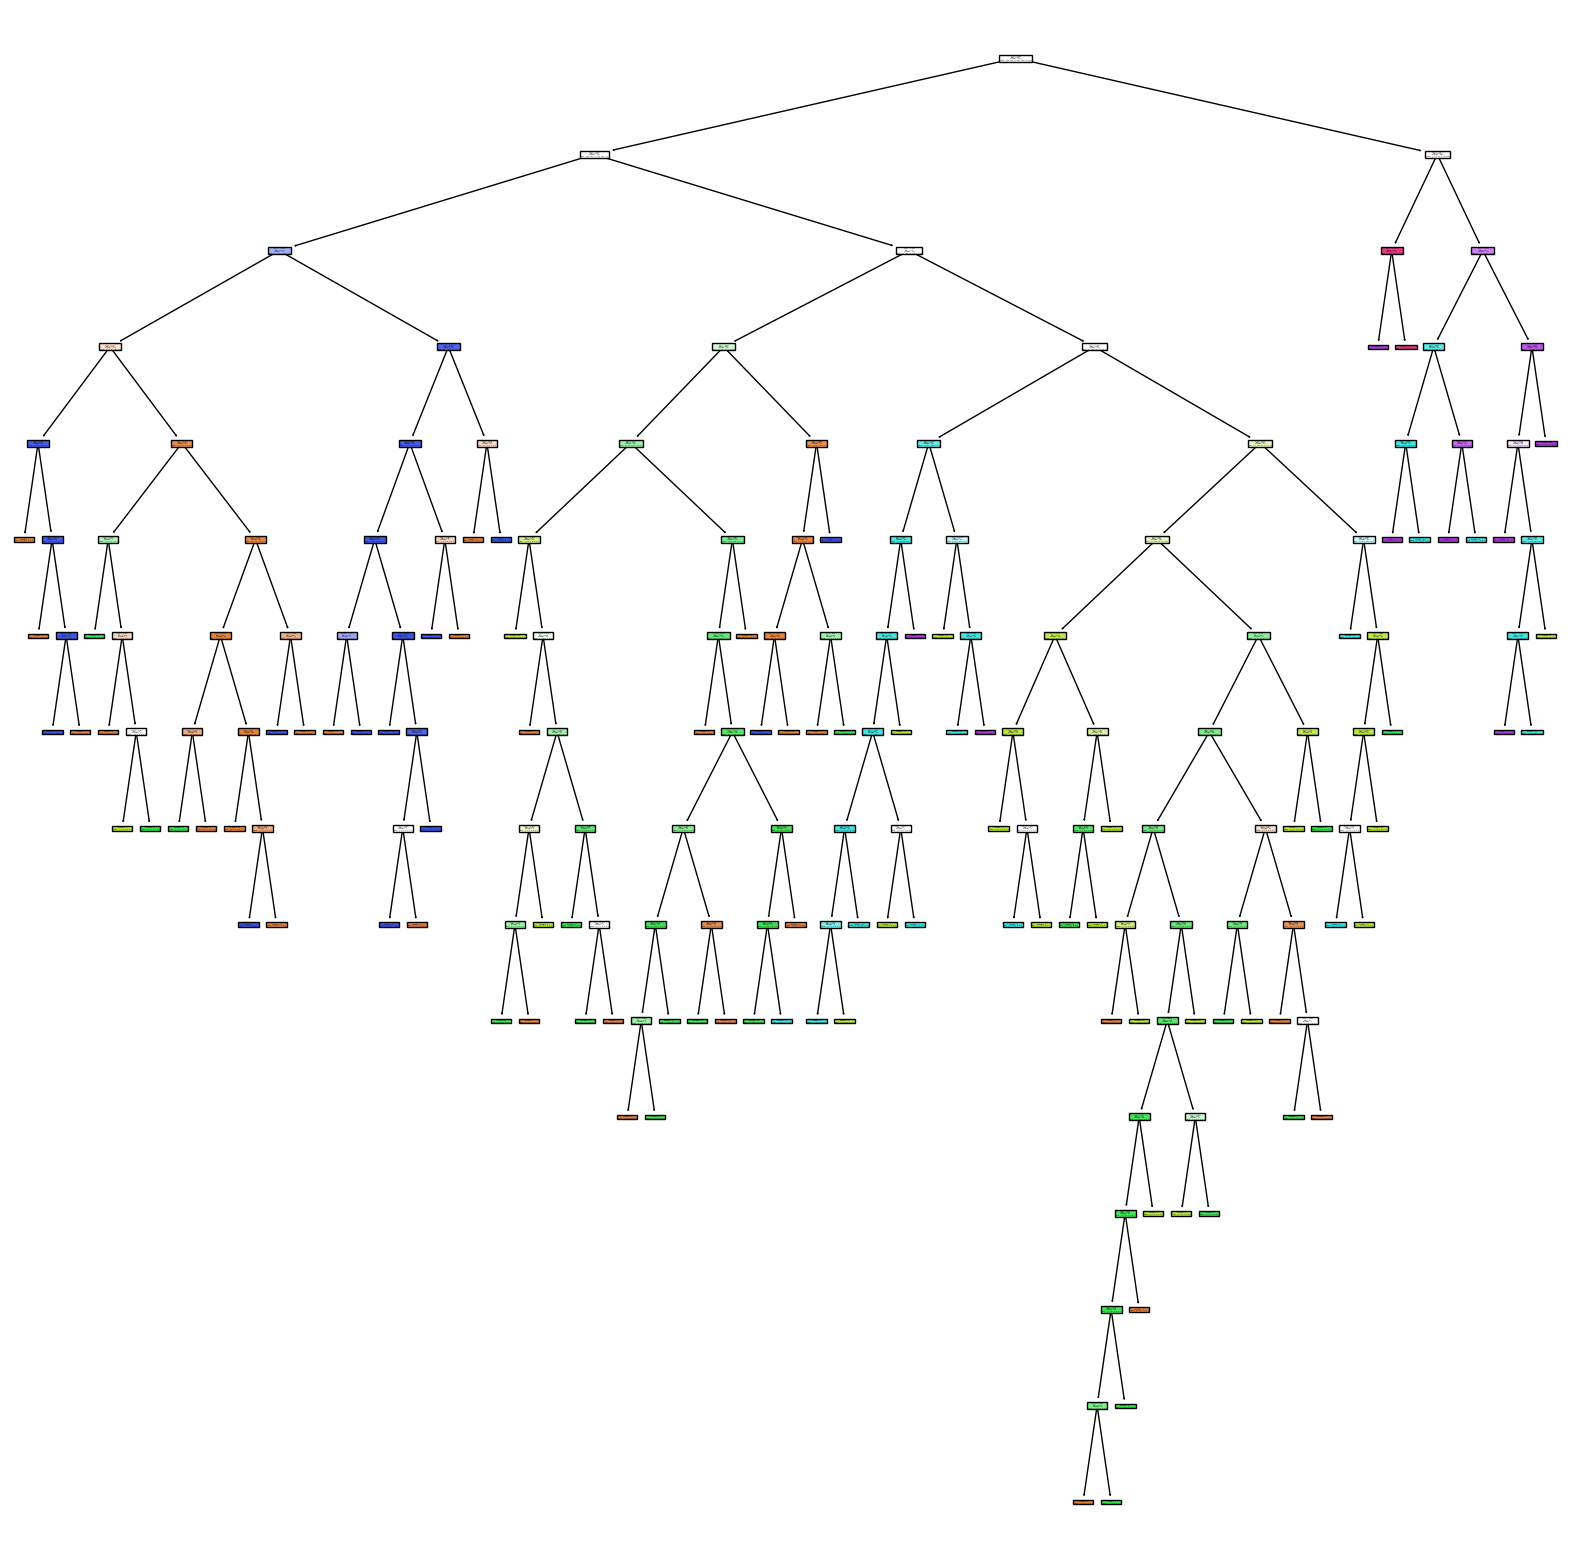

In [161]:
from sklearn import tree 
plt.figure(figsize=(20,20))
tree.plot_tree(decision_tree,filled=True)

In [162]:
y_pred2 = decision_tree.predict(X_test)

In [163]:
decision_tree.score(X_train,y_train)

0.14356435643564355

In [164]:
accuracy_score(y_test,y_pred2)

0.13486370157819225

In [165]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred2))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00        87
           2       0.00      0.00      0.00        94
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00        90
           5       0.13      1.00      0.24        94
           6       0.00      0.00      0.00       115

    accuracy                           0.13       697
   macro avg       0.02      0.14      0.03       697
weighted avg       0.02      0.13      0.03       697



In [166]:
dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha=0.14)
dt_model_ccp.fit(X_train_tf,y_train)

DecisionTreeClassifier(ccp_alpha=0.14, random_state=0)

[Text(0.5, 0.5, 'gini = 0.856\nsamples = 1414\nvalue = [184, 203, 196, 237, 182, 203, 209]')]

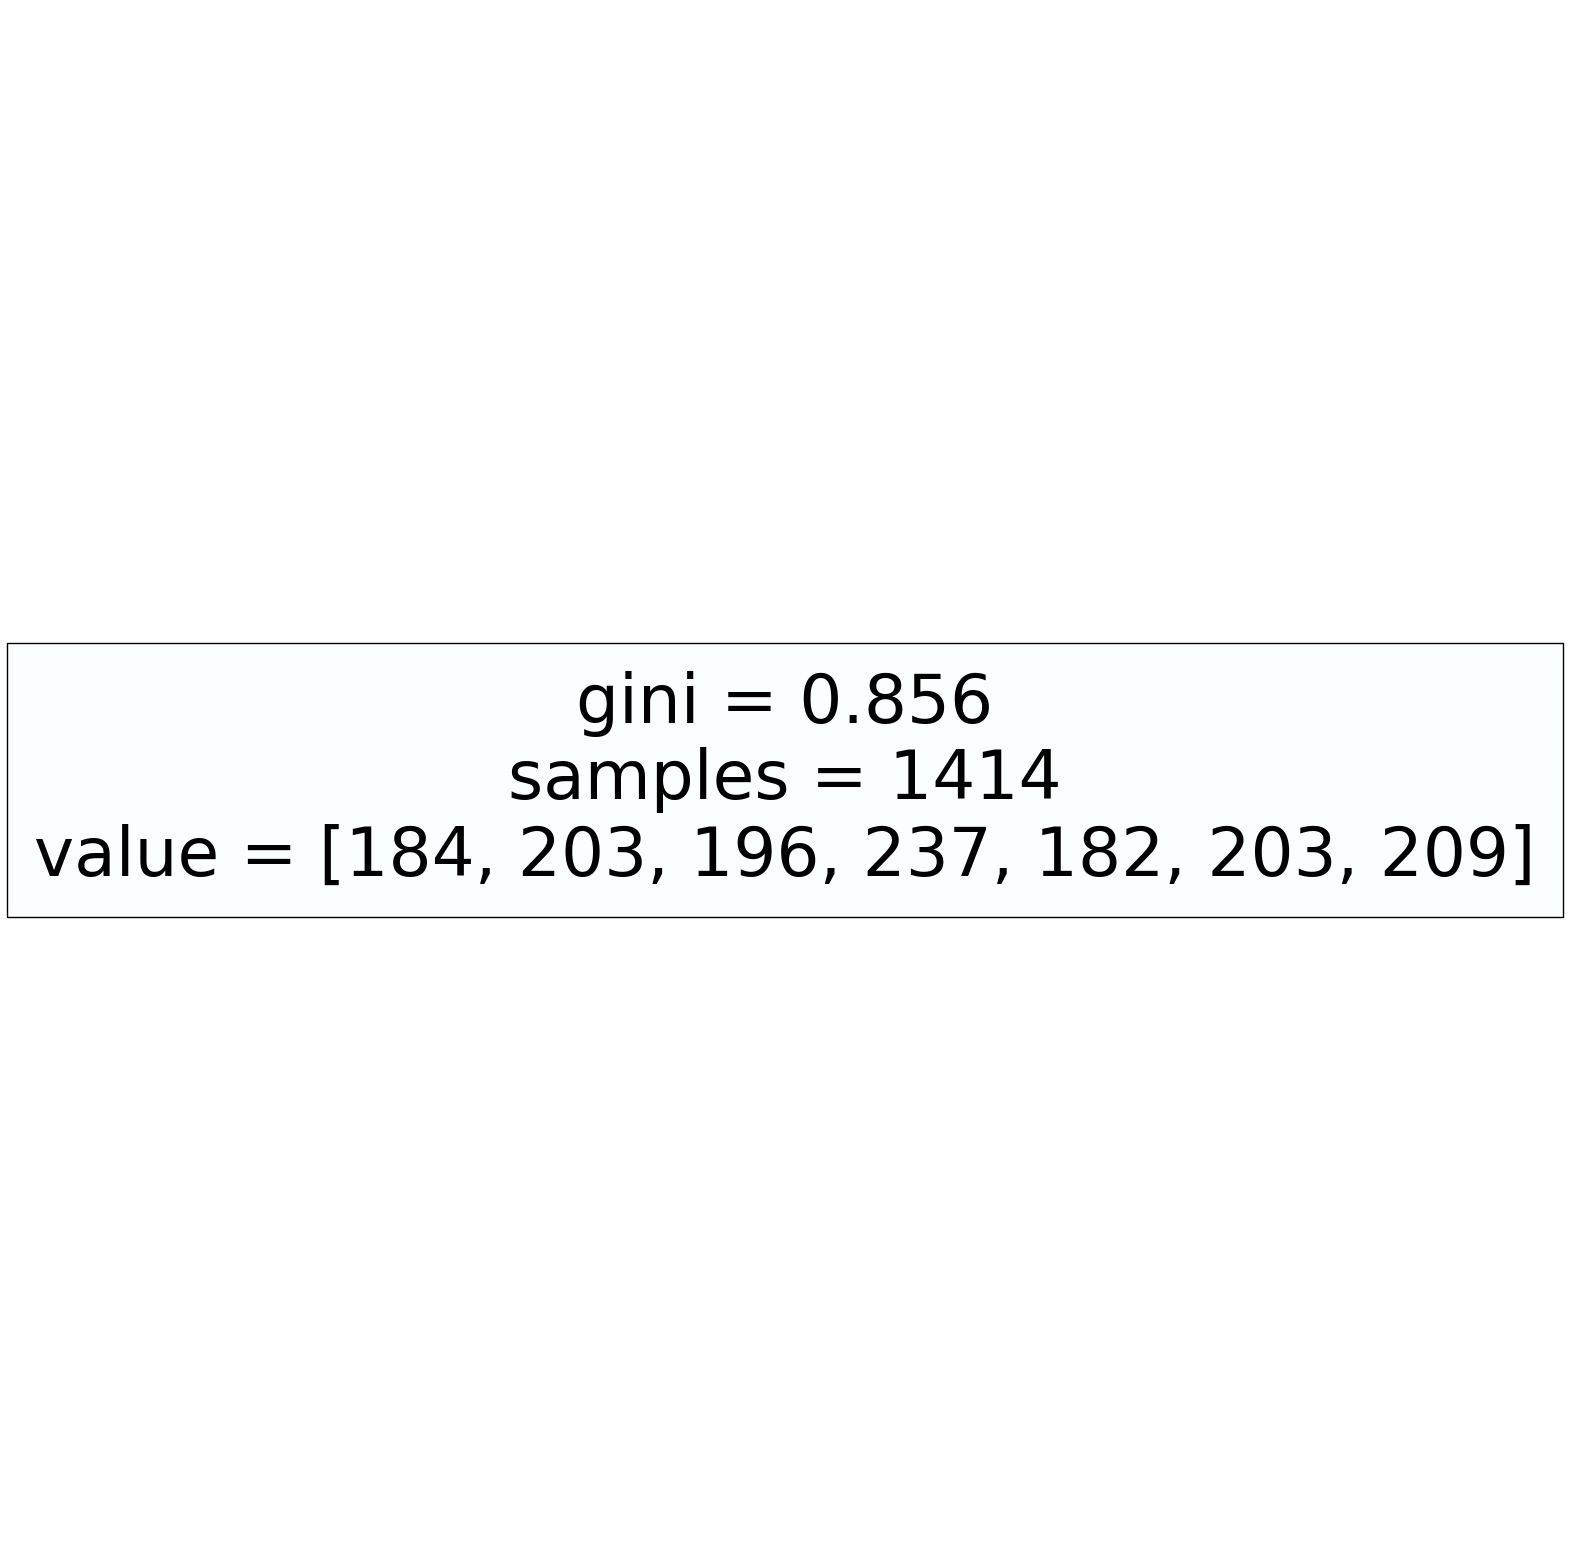

In [167]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [168]:
dt_model_ccp.score(X_train_tf,y_train)

0.1676096181046676

In [169]:
dt_model_ccp.score(X_test,y_test)

0.16355810616929697

In [170]:
rand_pram = {"criterion":['gini','entropy'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
            }

In [171]:
rand_ccp = RandomizedSearchCV(estimator=dt_model_ccp,param_distributions=rand_pram , cv = 10 , n_jobs=-1)

In [172]:
rand_ccp.fit(X_train_tf,y_train)

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.14,
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 40),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [173]:
rand_ccp.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 19,
 'criterion': 'entropy'}

In [174]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy',max_depth=33,min_samples_leaf=6,min_samples_split=9,splitter='random',ccp_alpha=0.014)

In [175]:
dt_cpp_new.fit(X_train_tf,y_train)

DecisionTreeClassifier(ccp_alpha=0.014, criterion='entropy', max_depth=33,
                       min_samples_leaf=6, min_samples_split=9,
                       splitter='random')

In [176]:
dt_cpp_new.score(X_train_tf,y_train)

0.7913719943422913

In [177]:
dt_cpp_new.score(X_test,y_test)

0.13486370157819225

### KneighborsClassifier

In [178]:
knn = KNeighborsClassifier()
knn.fit(X_train_tf, y_train)

KNeighborsClassifier()

In [179]:
knn_predictions = knn.predict(X_test_tf)

In [180]:
knn.score(X_train_tf,y_train)

0.8755304101838756

In [181]:
knn.score(X_test,y_test)

0.16642754662840745

In [182]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57       103
           1       0.71      0.76      0.73        87
           2       0.80      0.68      0.74        94
           3       0.82      0.84      0.83       114
           4       0.73      0.91      0.81        90
           5       0.86      0.96      0.90        94
           6       0.99      1.00      1.00       115

    accuracy                           0.81       697
   macro avg       0.80      0.81      0.80       697
weighted avg       0.80      0.81      0.80       697



### Random Forest Classifier

In [183]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tf, y_train)

RandomForestClassifier()

In [184]:
random_forest.score(X_train_tf,y_train)

1.0

In [185]:
random_forest.score(X_test,y_test)

0.15351506456241032

In [186]:
rf_predictions = random_forest.predict(X_test_tf)
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       103
           1       0.95      0.91      0.93        87
           2       0.89      0.85      0.87        94
           3       0.99      0.96      0.97       114
           4       0.99      0.94      0.97        90
           5       0.96      0.99      0.97        94
           6       1.00      0.99      1.00       115

    accuracy                           0.94       697
   macro avg       0.94      0.94      0.94       697
weighted avg       0.95      0.94      0.94       697

